In [1]:
# imports
from imutils import paths
import matplotlib.pyplot as plt
import numpy as np
import base64
import json
import cv2

In [2]:
# utility function to plot a sample image with its label
def show_sample_image():
    test_images = list(paths.list_images("test"))
    image_name = np.random.choice(test_images)
    label = image_name.split("/")[1]
    sample_image = plt.imread(image_name)
    plt.imshow(sample_image)
    plt.show()
    print("Label: ",label)
    return (image_name, sample_image, label)

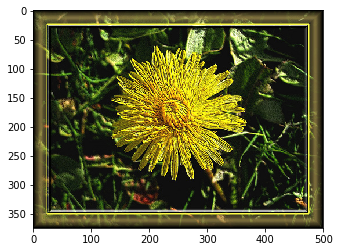

Label:  dandelion


In [3]:
image_name, sample_image, label = show_sample_image()

In [4]:
image_name

'test/dandelion/2229906591_e953785d13.jpg'

We separately write our test images (for inference) for keeping things clean. We will be using these serialized images to convert them to JSON strings :P

In [5]:
def export_png(image, name, label):
    image = image.astype(np.uint8)
    filename = "label_" + label + "_" + name + ".png"
    cv2.imwrite(filename, image)
    return "Image saved with filename: " + filename

In [7]:
image_name = image_name.split("/")[2].split(".")[0]
print(export_png(sample_image, image_name, label))

Image saved with filename: label_dandelion_2229906591_e953785d13.png


We need to pass our request payload in form of JSON strings (Base64 encoded). You can learn more about input data preparation for AI Platform from [here](https://www.google.com/url?q=https%3A%2F%2Fcloud.google.com%2Fml-engine%2Fdocs%2Ftensorflow%2Fonline-predict%3Fhl%3Den_US%23formatting_your_input_for_online_prediction). 

In [8]:
def png_to_json(image_filename, json_filename):
    with open(image_filename, "rb") as img_file:
        img_str = base64.b64encode(img_file.read()).decode()
        json_img = {"bytes":{"b64": str(img_str)}}
        
    with open(json_filename, 'w') as outfile:
        json.dump(json_img, outfile)
        
    return "File saved with filename: " + json_filename

In [9]:
png_to_json("label_dandelion_2229906591_e953785d13.png", 
            "label_dandelion_2229906591_e953785d13.json")

'File saved with filename: label_dandelion_2229906591_e953785d13.json'

With this let's go back to Terminal (instructions are available [here](https://github.com/sayakpaul/ML-Bootcamp-Launchpad/blob/master/GCP_Stuff.txt)) and get our output probabilities. 

In [27]:
# the order of our classes 
CLASSES = [b'daisy', b'dandelion', b'roses', b'sunflowers', b'tulips']

In [10]:
# let's run argmax to get the most likely class
np.argmax([0.005013992078602314, 0.974090039730072, 0.002557985484600067, 0.01791277527809143, 0.00042519604903645813])

1

One can use Cloud Functions to facilitate all of the above things. References are available:
- [GANs from Theory to Production](https://github.com/zurutech/gans-from-theory-to-production/blob/master/4.%20Production/4.1%20Serving%20Models%20using%20TF%202.0%20and%20Cloud%20Functions.ipynb)
- [How to serve deep learning models using TensorFlow 2.0 with Cloud Functions](https://cloud.google.com/blog/products/ai-machine-learning/how-to-serve-deep-learning-models-using-tensorflow-2-0-with-cloud-functions)